C:\Users\HP\AppData\Local\Temp\ipykernel_13404\2208657081.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2006-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


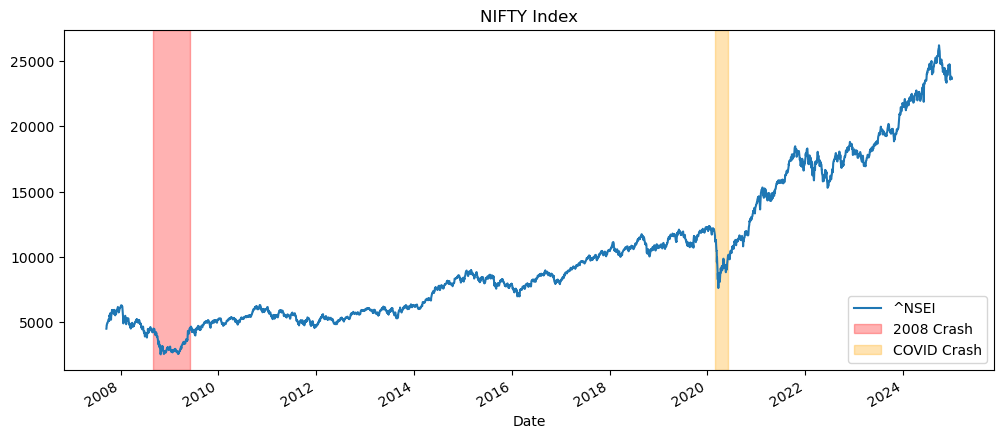

In [2]:
#Crash Analysis
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

nifty = yf.download("^NSEI", start="2006-01-01", end="2025-01-01")
nifty['Close'].plot(figsize=(12,5), title="NIFTY Index")
plt.axvspan('2008-09-01', '2009-06-01', color='red', alpha=0.3, label='2008 Crash')
plt.axvspan('2020-03-01', '2020-06-01', color='orange', alpha=0.3, label='COVID Crash')
plt.legend()
plt.show()


In [1]:
#Mutual Fund Planner

import pandas as pd

mutual_funds = pd.DataFrame({
    'Fund': ['HDFC Equity', 'SBI Small Cap', 'ICICI Liquid'],
    'Category': ['Equity', 'Small Cap', 'Liquid'],
    'Risk': ['High', 'Very High', 'Low'],
    '5Y_Return': [0.15, 0.22, 0.06]
})

def recommend_fund(risk):
    return mutual_funds[mutual_funds['Risk'].str.contains(risk, case=False)]

recommend_fund('Low')


,Fund,Category,Risk,5Y_Return
2,ICICI Liquid,Liquid,Low,0.06


C:\Users\HP\AppData\Local\Temp\ipykernel_17296\1679934478.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  4 of 4 completed

Using 'Close' prices instead of 'Adj Close'


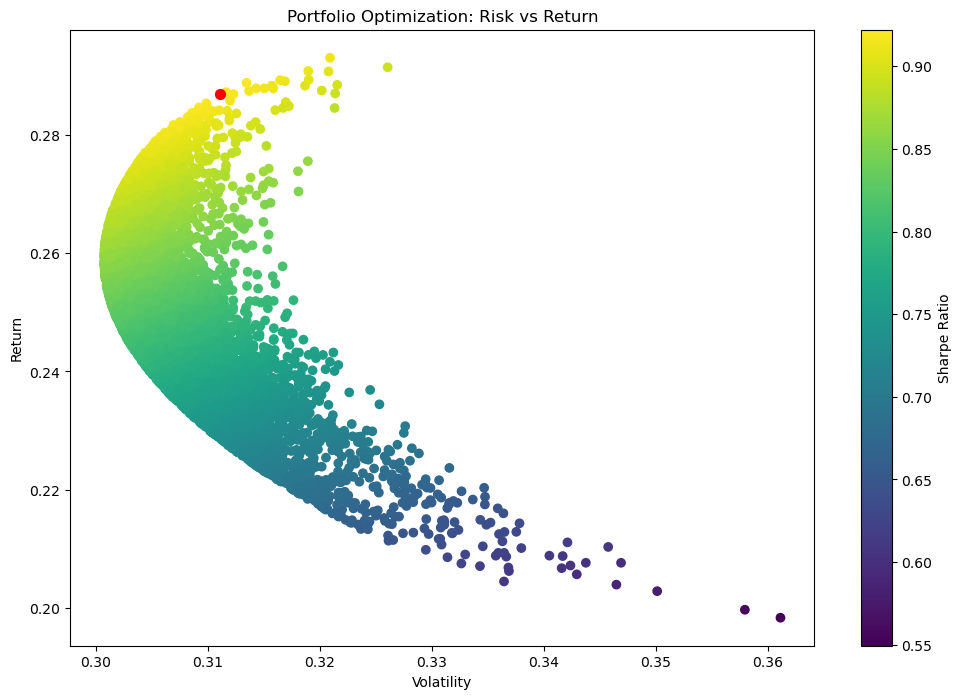

Best Portfolio Weights:
AAPL: 55.46%
MSFT: 0.52%
GOOGL: 3.38%
AMZN: 40.64%


In [4]:
#Portfolio Optimization
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pick your stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Download historical prices
# Using try/except to handle potential column name issues
try:
    data = yf.download(tickers, start="2020-01-01", end="2024-01-01")
    # Check if 'Adj Close' exists, otherwise use 'Close'
    if 'Adj Close' in data.columns.levels[0]:
        price_data = data['Adj Close']
    else:
        price_data = data['Close']
        print("Using 'Close' prices instead of 'Adj Close'")
except Exception as e:
    print(f"Error downloading data: {e}")
    # If download fails completely, exit or handle accordingly
    raise

returns = price_data.pct_change().dropna()

# Simulation
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(tickers)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    all_weights[i,:] = weights
    
    ret_arr[i] = np.sum((returns.mean() * weights) * 252)
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_arr[i] = ret_arr[i] / vol_arr[i]

# Find best portfolio
max_sharpe_idx = sharpe_arr.argmax()
best_weights = all_weights[max_sharpe_idx]

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(vol_arr[max_sharpe_idx], ret_arr[max_sharpe_idx], c='red', s=50)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Portfolio Optimization: Risk vs Return')
plt.show()

print("Best Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {best_weights[i]*100:.2f}%")